In [81]:
import pandas as pd
import os
import sys

def leer_archivo(ruta_archivo: str):
    # Verificar que el archivo existe
    if not os.path.exists(ruta_archivo):
        sys.exit(f"❌ El archivo no existe: {ruta_archivo}")

    # Detectar la extensión
    extension = os.path.splitext(ruta_archivo)[1].lower()

    try:
        if extension == ".csv":
            df = pd.read_csv(
                ruta_archivo,
                thousands=",",         # ✅ interpreta comas como miles (2022, 20000)
                na_values=["", " "],   # ✅ vacíos como NaN
                keep_default_na=True
            )
        elif extension in [".xls", ".xlsx"]:
            df = pd.read_excel(ruta_archivo)
        elif extension == ".json":
            df = pd.read_json(ruta_archivo)
        else:
            sys.exit(f"⚠️ Tipo de archivo no soportado: {extension}")

        # Mostrar solo las primeras 10 filas
        print(df.head(10))
        return df

    except Exception as e:
        sys.exit(f"❌ Error al leer el archivo: {e}")

In [82]:
def combinar_dataframes(df1, df2, cols1=None, cols2=None, how="inner"):
    """
    Combina dos DataFrames en base a columnas comunes o especificadas.
    
    Parámetros:
    -----------
    df1 : DataFrame
        Primer DataFrame
    df2 : DataFrame
        Segundo DataFrame
    cols1 : str o list, opcional
        Columna(s) en df1 para la unión
    cols2 : str o list, opcional
        Columna(s) en df2 para la unión
    how : str, default "inner"
        Tipo de unión: 'left', 'right', 'outer', 'inner'

    Retorna:
    --------
    DataFrame combinado
    """
    if cols1 is None and cols2 is None:
        # Detectar columnas comunes automáticamente
        comunes = list(set(df1.columns) & set(df2.columns))
        if not comunes:
            raise ValueError("❌ No hay columnas en común para combinar.")
        return pd.merge(df1, df2, on=comunes, how=how)

    elif cols1 is not None and cols2 is not None:
        # Unión con columnas diferentes
        return pd.merge(df1, df2, left_on=cols1, right_on=cols2, how=how)

    else:
        raise ValueError("❌ Debes pasar ambas listas de columnas (cols1 y cols2) o ninguna.")

In [83]:
import matplotlib.pyplot as plt

# Ruta del archivo
ruta = "./data/uso_estaciones.csv"
df = leer_archivo(ruta)

   CONSUMO PRIMERA MITAD DEL MES  CONSUMO SEGUNDA MITAD DEL MES  \
0                          360.0                         5916.0   
1                         3306.0                         4749.0   
2                          440.0                         6087.0   
3                         3602.0                         4543.0   
4                         2684.0                         5976.0   
5                         2640.0                         6246.0   
6                          440.0                         7641.0   
7                         2880.0                         5947.0   
8                          520.0                         8947.0   
9                         1206.0                        10557.0   

   TOTAL DE CONSUMO         MES   AÑO  
0            6276.0       Enero  2019  
1            8055.0     Febrero  2019  
2            6527.0       Marzo  2019  
3            8145.0       Abril  2019  
4            8660.0        Mayo  2019  
5            8886.0   

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Asegurarse que las columnas de 'Consumo Primera Mitad' y 'Consumo Segunda Mitad' sean numéricas
df["CONSUMO PRIMERA MITAD DEL MES"] = pd.to_numeric(df["CONSUMO PRIMERA MITAD DEL MES"], errors="coerce")
df["CONSUMO SEGUNDA MITAD DEL MES"] = pd.to_numeric(df["CONSUMO SEGUNDA MITAD DEL MES"], errors="coerce")
df["TOTAL DE CONSUMO"] = pd.to_numeric(df["TOTAL DE CONSUMO"], errors="coerce")

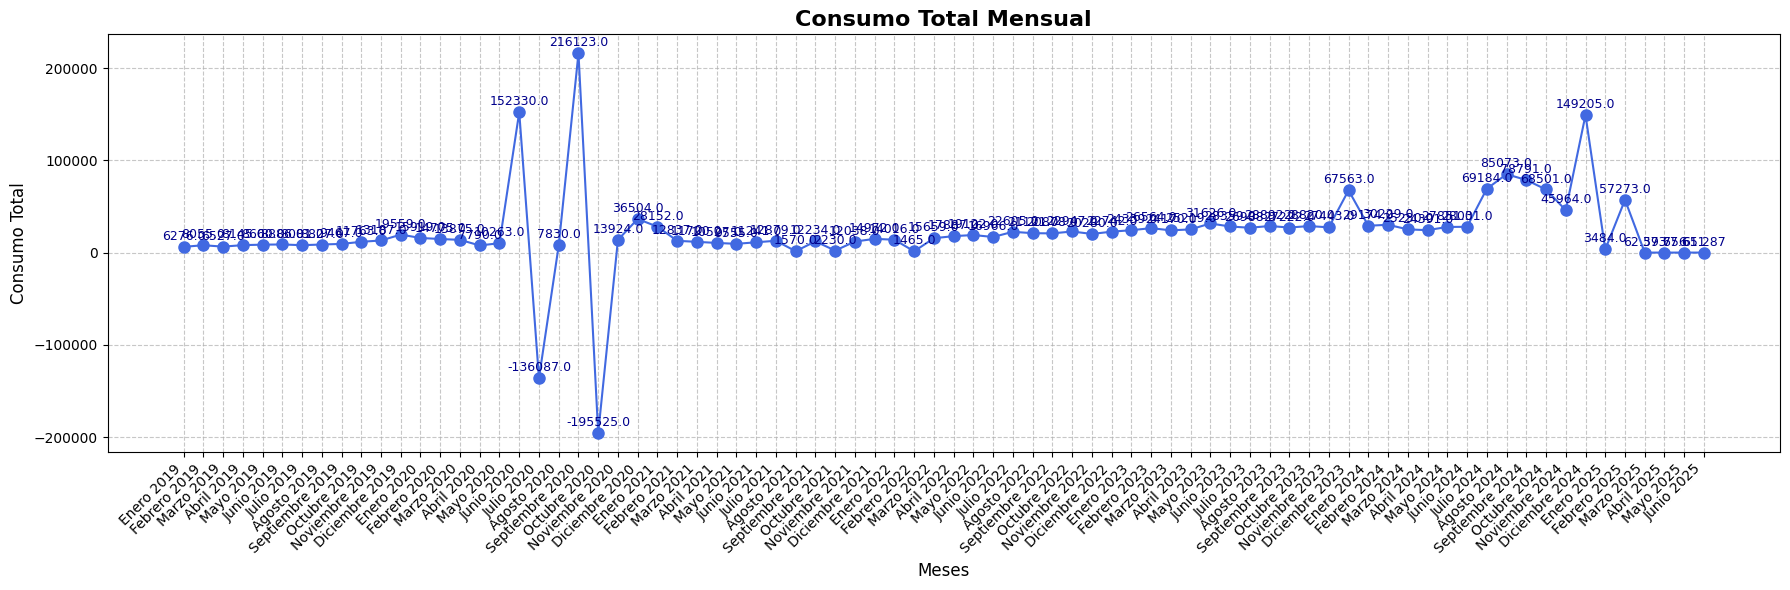

In [85]:
# 1. Graficar el consumo total por mes con colores llamativos y etiquetas en los puntos
plt.figure(figsize=(18, 6))
plt.plot(df["MES"] + " " + df["AÑO"].astype(str), df["TOTAL DE CONSUMO"], marker='o', linestyle='-', color='royalblue', markersize=8)
plt.title("Consumo Total Mensual", fontsize=16, fontweight='bold')
plt.xlabel("Meses", fontsize=12)
plt.ylabel("Consumo Total", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Etiquetas en los puntos
for i, txt in enumerate(df["TOTAL DE CONSUMO"]):
    x_val = (df["MES"] + " " + df["AÑO"].astype(str))[i]
    y_val = df["TOTAL DE CONSUMO"][i]
    plt.annotate(f'{txt}', (i, y_val), xytext=(0, 5), textcoords="offset points",
            ha='center', fontsize=9, color='darkblue')


plt.tight_layout()

plt.show()

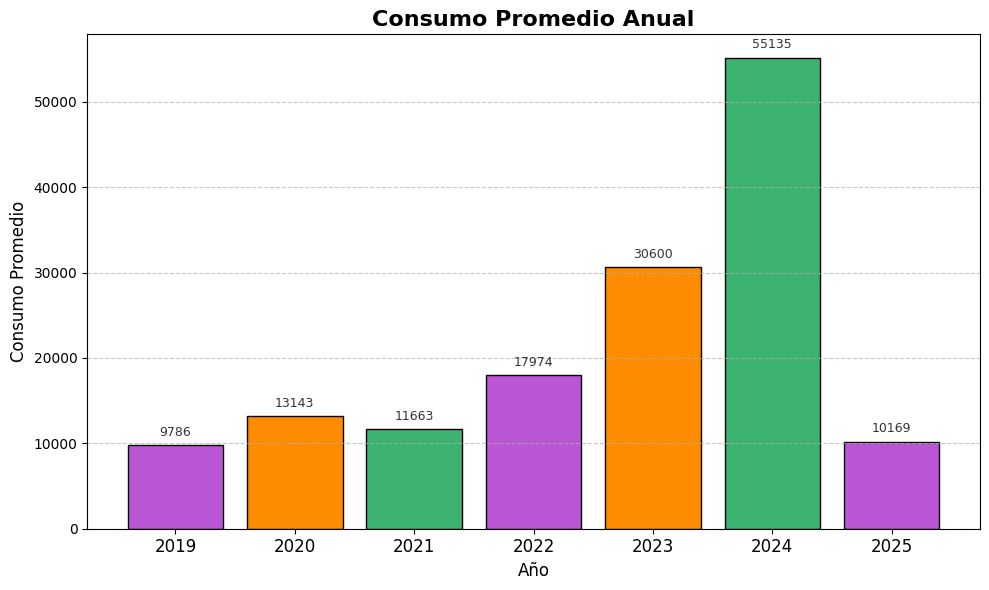

In [86]:
# 3. Graficar el consumo promedio anual por año con barras llamativas
df["AÑO"] = df["AÑO"].astype(str)
consumo_anual = df.groupby("AÑO")["TOTAL DE CONSUMO"].mean()

# Graficar el consumo promedio anual
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(consumo_anual)), consumo_anual.values,
                color=['mediumorchid', 'darkorange', 'mediumseagreen'],
                edgecolor='black')

plt.title("Consumo Promedio Anual", fontsize=16, fontweight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Consumo Promedio", fontsize=12)
plt.xticks(ticks=range(len(consumo_anual)), labels=consumo_anual.index, fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Etiquetas encima de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + (max(consumo_anual.values) * 0.02),
            f'{height:.0f}', ha='center', fontsize=9, color='#333')

plt.show()
